In [1]:
import re
import sys
import glob
import shutil

In [ ]:
# This function create the name_list from the diretory
# #input:
#     path_list :- path_list or path string (if path string then it used to read all file in directory path with *)
#                   ex:- 'C:/Users/Sanjeev/Documents/Accenture office/segmentation/water_damage_img/*'
#     ext_list=[], list of extention for which name will be considered ex:- ['xml','jpg'] etc
#     name_with_ext= False,  if true then file extention will be include in namelist ex:- img.jpg otherwise skipped ex:- img
#     mult_dir =False, if true then path_list would be the path of the different directory *(not implemented)*
# output:
#     name_list -> file name list 
#----------------------------------------------------------------------------------------------------------------------------#
# library needed
# import glob

#------------------------------------------------------------------------------------------------------------------------#
def create_file_name_list(path_list,ext_list=[],name_with_ext=False,mult_dir=False):
    name_list = []
    res = isinstance(path_list,str)
    if res:
        print('read all file from directory')
        path_list = glob.glob(path_list)
#         print('file read : ', len(path_list))

    if len(ext_list)==0:
        print('rading all file')
        for path in path_list:
            path=path.replace('\\','/')
            file= path.split('/')[-1]
            if name_with_ext:
                name_list.append(file)
            else:
                file = file.split('.')[0]
                name_list.append(file)
    else:
        print('reading file with extention ',ext_list )
        for path in path_list:
            path=path.replace('\\','/')
            file= path.split('/')[-1]
            if file.split('.')[-1] in ext_list:
                if name_with_ext:
                    name_list.append(file)
                else:
                    file = file.split('.')[0]
                    name_list.append(file)
                
    return name_list
            
        

In [6]:
# this funtion copy the lists file from source to destination
#input:
#     path_list :- path list or path string- ( if string then read all file from directory must be */all form )
#     dest :- string of path where file should be copied
#     include_file='All' -> name list with or without extention or all for every file in directory  
#     skip_ext_file=None -> sting of extention that want to skip ex:- 'xml'
    
# return 
#     print the no of file it has copied 
#----------------------------------------------------------------------------------------------------------------------------#
# library needed
# import glob
# import shutil
#----------------------------------------------------------------------------------------------------------------------------#
def copy_file(path_list,dest,include_file='All', skip_ext_file=None):
    res = isinstance(path_list,str)
    if res:
        path_list = glob.glob(path_list)
    
    res = isinstance(include_file,list)
    if res: # if name list is passed wihout extention. so it usefull when image and xml file have to move 
        count=0
        print('copy file by looking name list')
        for path in path_list:
            path=path.replace('\\','/')
            file_extention = path.split('/')[-1]
            file_name = file_extention.split('.')[0]
            ext=file_extention.split('.')[-1]
            if file_name in include_file and  ext != skip_ext_file: #checking name without extention 
                shutil.copyfile(path,dest+file_extention)
                count+=1
        print('No of file copy : ',count)
        
    elif include_file=='All':
        count=0
        print('copy all file')
        for path in path_list:
            path=path.replace('\\','/')
            file_extention = path.split('/')[-1]
            shutil.copyfile(path,dest+file_extention)
            count+=1
        print('No of file copy : ',count)

In [7]:
s_path ='C:/Users/Sanjeev/Documents/Accenture office/segmentation/water_damage_annot/*.xml'
d_path='C:/Users/Sanjeev/Documents/Accenture office/segmentation/water_damage/'
copy_file(s_path,d_path,'All')

copy all file
No of file copy :  123


In [ ]:
source ='C:/Users/Sanjeev/Documents/Accenture office/segmentation/House/House/*'
dest='C:/Users/Sanjeev/Documents/Accenture office/segmentation/House/'
name_list =create_file_name_list(source,ext_list=['xml'])
print(len(name_list))

In [ ]:
copy_file(source,dest,name_list,'xml')

In [27]:
import matplotlib.pyplot as plt
import cv2
def display_image(img,title='Image',fig_size =(15, 9)):
    fig = plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(fig_size)
    
    res = isinstance(img,str)
    if res:
        img = cv2.imread(img)
        
    if len(img.shape)==3:
        img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    else:
        plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
        

        
def compare_image(img1, img2,fig_size =(15, 9)):
    #fig,(ax1,ax2) = plt.subplots(1,2)
    fig = plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(fig_size)
    
    res = isinstance(img1, str)
    if res:
        img1= cv2.imread(img1)
    res =isinstance(img2,str)
    if res:
        img2= cv2.imread(img2)
    
    ax1 =fig.add_subplot(1,2,1)
    if len(img1.shape)==3: 
        img1= cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
        plt.imshow(img1)
    else:
        plt.imshow(img1, cmap='gray')
    ax1.set_title("original")
    ax1.axis('off')
       
    ax2 =fig.add_subplot(1,2,2)
    if len(img1.shape)==3: 
        img2= cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
        plt.imshow(img2)
    else:
        plt.imshow(img2,cmap='gray')
    ax2.set_title("result")
    ax2.axis('off')
   
  


In [ ]:
source ='C:/Users/Sanjeev/Documents/Accenture office/segmentation/water_damage_img/*.jpg'
img_list= glob.glob(source)

In [ ]:
img1= cv2.imread(img_list[0])
img2= cv2.imread(img_list[1])
# cv2.cvtColor(mask_img,cv2.COLOR_BGR2GRAY)
img3=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [ ]:
display_image(img_list[3])
# compare_image(img_list[0],img_list[1])

In [ ]:
display_image(img_list[0])

## Funciton to merge pdf into one file

In [44]:
# This function merge multiple file in one file
# input:
#     pdf_path:- list of path or directive path 
#     save_path :- full save path with file name
#     merged_order=None, if not None then file is merged in integer order_list (no of pdf file and len of this list should be same ) 
# ouput
#     print the no of file is merged 

#----------------------------------------------------------------------------------------------------------------------------#
#library 
# from PyPDF2 import PdfFileMerger, PdfFileReader
# import glob
#---------------------------------------------------------------------------------------------------------------------------#
def merged_pdf(pdf_path, save_path,merged_order=None):

    res =isinstance(pdf_path,str)
    count=0
    if res:
        pdf_path=glob.glob(pdf_path+'/*.pdf')
    # Call the PdfFileMerger
    merged_object = PdfFileMerger()
    if merged_order:
        for idx in merge_order_list :
            merged_object.append(PdfFileReader(pdf_path[idx], 'rb'))
            count +=1
    else:
        for path in pdf_path :
            merged_object.append(PdfFileReader(path, 'rb'))
            count+=1
    # Write all the files into a file which is named as shown below
    merged_object.write(save_path)
    print('no of file is merged : ',count)

In [41]:
dir_path = 'C:/Users/Sanjeev/Desktop/work_doc/*.pdf'
save_path='C:/Users/Sanjeev/Desktop/work_doc/work_consolidate.pdf'

In [42]:
import glob
import PyPDF2

In [43]:
pdf_path_list =glob.glob(dir_path)
print(len(pdf_path_list))
pdf_path_list

5


['C:/Users/Sanjeev/Desktop/work_doc\\Consolidate - Jupyter Notebook.pdf',
 'C:/Users/Sanjeev/Desktop/work_doc\\EAST_text_Detector - Jupyter Notebook.pdf',
 'C:/Users/Sanjeev/Desktop/work_doc\\pixelLib_segmentation - Jupyter Notebook.pdf',
 'C:/Users/Sanjeev/Desktop/work_doc\\visualize_result - Jupyter Notebook.pdf',
 'C:/Users/Sanjeev/Desktop/work_doc\\yolo_Detection - Jupyter Notebook.pdf']

In [15]:
# name =[path.split('\\')[-1] for path in pdf_path]
# print(name)
merge_order_list= [0,1,4,3,2]


In [46]:
merged_pdf(pdf_path,save_path,merge_order_list)

no of file is merged :  5


In [ ]:
import PyPDF2 
 
# Open the files that have to be merged one by one
pdf1File = open(pdf_path[0], 'rb')
pdf2File = open(pdf_path[1], 'rb')
 
# Read the files that you have opened
pdf1Reader = PyPDF2.PdfFileReader(pdf1File)
pdf2Reader = PyPDF2.PdfFileReader(pdf2File)
 
# Create a new PdfFileWriter object which represents a blank PDF document
pdfWriter = PyPDF2.PdfFileWriter()
 
# Loop through all the pagenumbers for the first document
for pageNum in range(pdf1Reader.numPages):
    pageObj = pdf1Reader.getPage(pageNum)
    pdfWriter.addPage(pageObj)
 
# Loop through all the pagenumbers for the second document
for pageNum in range(pdf2Reader.numPages):
    pageObj = pdf2Reader.getPage(pageNum)
    pdfWriter.addPage(pageObj)
 
# Now that you have copied all the pages in both the documents, write them into the a new document
pdfOutputFile = open(save_path, 'wb')
pdfWriter.write(pdfOutputFile)
 
# Close all the files - Created as well as opened
pdfOutputFile.close()
pdf1File.close()
pdf2File.close()

In [4]:
dir_path='C:/Users/Sanjeev/Documents/Accenture office/segmentation/water_damage_annot'

In [2]:
# This function create the file list from given directory
# input: 
#     dir_path:- path to the drectory
#     ext=[None] :- if None then all file is read else list of extention file should be passed.
#     include=True : used to include of exclude extention file. so it used with ext if some list is passed
# output:
#     path_list: path list 

#----------------------------------------------------------------------------------------------------------------------------#
# library
# import glob
#----------------------------------------------------------------------------------------------------------------------------#

def create_path_list(dir_path,ext=[None],include=False):
    
    path_list =[]
    for path in glob.glob(dir_path+'/*'):
        path = path.replace('\\','/')
        file_ext=path.split('/')[-1]
        if include:
            if file_ext.split('.')[-1] in ext:
                path_list.append(path)
        else:
            if file_ext.split('.')[-1] not in ext:
                path_list.append(path)
            
    return path_list

In [5]:
xml_file_list = create_path_list(dir_path,'xml',True)
# img_file_list = create_path_list(dir_path,'xml',False)
# print(len(xml_file_list),len(img_file_list))
# print(xml_file_list[0],img_file_list[0])

In [32]:
xml_name = [name.split('/')[-1].split('.')[0] for name in xml_file_list]
img_name = [name.split('/')[-1].split('.')[0] for name in img_file_list]
xml_name==img_name

True

In [26]:
import xml.etree.ElementTree as ET


def extract_bbox_from_xml(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()
    bbox = list()
    for box in root.findall('.//bndbox'):
        xmin = int(box.find('xmin').text)
        ymin = int(box.find('ymin').text)
        xmax = int(box.find('xmax').text)
        ymax = int(box.find('ymax').text)
        bbox.append([xmin, ymin, xmax, ymax])
    return bbox

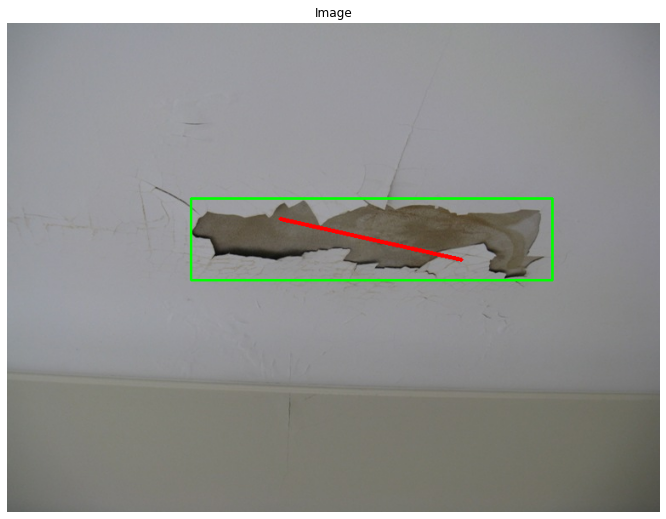

In [35]:
for idx, xml_path in enumerate(xml_file_list):
    bbox = extract_bbox_from_xml(xml_path)
    image = cv2.imread(img_file_list[idx])
    for box in bbox:
        width = int((box[2]-box[0]))
        height = int((box[3]-box[1]))
        
        x_centre = int(box[0] + width/2)
        y_centre = int(box[1] + height/2)
        
        # represents the top right corner of image
        start_point = (int(x_centre-width/4), int(y_centre-height/4))

        # End coordinate, here (0, 225)
        # represents the bottom left corner of image
        end_point = (int(x_centre+width/4), int(y_centre+height/4))

        # Black color in BGR
        color = (0, 0, 255)

        # Line thickness of 5 px
        thickness = 4
        
        cv2.line(image, start_point, end_point, color, thickness)
        cv2.rectangle(image, (box[0], box[1]), (box[2], box[3]), (0,255,0), 2)
    display_image(image)
    break

In [ ]:
 # Reading an image in grayscale mode
    image = cv2.imread(imageinputpath)

In [ ]:
def stroke_create(imageinputpath):
    
    for b in box:
        
        width = int((box[0][2]-box[0][0]))
        height = int((box[0][3]-box[0][1]))

 

        x_centre = int(box[0][0] + width/2)
        y_centre = int(box[0][1] + height/2)

 

        # Reading an image in grayscale mode 
        image = cv2.imread(imageinputpath) 

 

        # Window name in which image is displayed 
        window_name = 'Image'

 


        # Start coordinate, here (225, 0) 
        # represents the top right corner of image 
        start_point = (int(x_centre-width/4), int(y_centre-height/4))

 

        # End coordinate, here (0, 225) 
        # represents the bottom left corner of image 
        end_point = (int(x_centre+width/4), int(y_centre+height/4)) 

 

        # Black color in BGR 
        color = (0,0,255) 

 

        # Line thickness of 5 px 
        thickness = 4

 

        # Using cv2.line() method 
        # Draw a diagonal black line with thickness of 5 px 
        image = cv2.line(image, start_point, end_point, color, thickness) 

 

        # Displaying the image  
        cv2.imwrite(imageinputpath, image)